In [1]:
# from __future__ import division
import itertools

# To get rid of those blocks of red warnings
import warnings
warnings.filterwarnings("ignore")

# Standard Imports
import numpy as np
from scipy import stats
import pandas as pd
from math import sqrt
import os
from scipy.stats import spearmanr
from sklearn import metrics
from random import randint
from typing import Dict, List, Optional, Union, cast
from time import sleep

# Vis Imports
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.express as px
from pandas.plotting import register_matplotlib_converters
from mpl_toolkits.mplot3d import Axes3D
from wordcloud import WordCloud

# Modeling Imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression, RFE
import sklearn.preprocessing
import statsmodels.api as sm
from sklearn.cluster import DBSCAN

# NLP Imports
import unicodedata
import re
import json
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

# Custom Module Imports
from env import github_token, github_username
import acquire

In [2]:
# execfile('acquire.py')
# df = open('data.json')
# df = json.load(df)
# df = pd.DataFrame(df)

In [3]:
# df = pd.DataFrame(df)

In [4]:
# df

In [5]:
# url = 'https://github.com/search?l=&p=1&q=stars%3A%3E100&ref=advsearch&type=Repositories'



In [6]:
# headers = {'User-Agent': 'Codeup Data Science'}
# response = requests.get(url, headers=headers).content

In [7]:
# soup = BeautifulSoup(response, 'html.parser')

In [8]:
# links = []
# for link in soup.find_all('a', class_='v-align-middle'):
#     links.append(link.text)

In [9]:
# 'https://github.com/search?l=&p=' + str(page) + '&q=stars%3A%3E100&ref=advsearch&type=Repositories'

In [10]:
# list_rep = []

# for i in range(1,10):
#     response = requests.get('https://github.com/search?l=&p=' + str(i) + '&q=stars%3A%3E100&ref=advsearch&type=Repositories')
#     soup = BeautifulSoup(response.content, 'html.parser')
    
#     for repo in soup.find_all('a', class_ = 'v-align-middle'):
#         list_rep.append(repo.text)
        
# list_rep

In [11]:
# len(list_rep)

In [12]:
# list_rep2 = []

# for i in range(11,20):
#     response = requests.get('https://github.com/search?l=&p=' + str(i) + '&q=stars%3A%3E100&ref=advsearch&type=Repositories')
#     soup = BeautifulSoup(response.content, 'html.parser')
    
#     for repo in soup.find_all('a', class_ = 'v-align-middle'):
#         list_rep2.append(repo.text)
        
# list_rep2

In [13]:
# len(list_rep2)

In [14]:
# list_rep = []
# for i in range(1,5):
#     headers = {'User-Agent': github_username}
#     sleep(randint(2,10))
#     response = requests.get('https://github.com/search?l=&p=' + str(i) + '&q=stars%3A%3E100&ref=advsearch&type=Repositories', headers=headers)
#     soup = BeautifulSoup(response.content, 'html.parser')
#     for repo in soup.find_all('a', class_ = 'v-align-middle'):
#         list_rep.append(repo.text)
# list_rep2 = []
# for i in range(6,11):
#     headers = {'User-Agent': github_username}
#     sleep(randint(2,10))
#     response = requests.get('https://github.com/search?l=&p=' + str(i) + '&q=stars%3A%3E100&ref=advsearch&type=Repositories', headers=headers)
#     soup = BeautifulSoup(response.content, 'html.parser')
#     for repo in soup.find_all('a', class_ = 'v-align-middle'):
#         list_rep2.append(repo.text)
# full_list = list_rep + list_rep2
# REPOS = full_list

In [15]:
# REPOS

In [16]:
# len(REPOS)

In [17]:
df = pd.read_csv('languages.csv')

In [18]:
df.head(1)

,Unnamed: 0,repo,language,readme_contents
0,0,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot..."


In [19]:
df = df.iloc[: , 1:]
df.head(1)

,repo,language,readme_contents
0,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot..."


In [20]:
df.shape

(160, 3)

In [21]:
df.head()

,repo,language,readme_contents
0,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot..."
1,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...
2,github/docs,JavaScript,# GitHub Docs <!-- omit in toc --> \n\nThis re...
3,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...
4,RedHatTraining/DO180-apps,JavaScript,# DO180-apps\nDO180 Repository for Sample Appl...


In [22]:
df.language.isnull().sum()

0

In [23]:
df = df.dropna()

In [24]:
df.shape

(159, 3)

In [25]:
df

,repo,language,readme_contents
0,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot..."
1,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...
2,github/docs,JavaScript,# GitHub Docs <!-- omit in toc --> \n\nThis re...
3,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...
4,RedHatTraining/DO180-apps,JavaScript,# DO180-apps\nDO180 Repository for Sample Appl...
...,...,...,...
155,mongodb/mongo,C++,# ![Logo](docs/leaf.svg) MongoDB README\n\nWel...
156,ClickHouse/ClickHouse,C++,[![ClickHouse — open source distributed column...
157,ceph/ceph,C++,\nLast updated: 2017-04-08\n\nThe FreeBSD buil...
158,facebook/folly,C++,Folly: Facebook Open-source Library\n=========...


In [26]:
df.language.value_counts(normalize=True)

JavaScript    0.251572
Python        0.251572
Java          0.251572
C++           0.245283
Name: language, dtype: float64

In [27]:
# 'https://github.com/search?l=JavaScript&p=' + str(i) + '&q=stars%3A%3E100+language%3AJavaScript+language%3AJavaScript&ref=advsearch&type=Repositories'
# 'https://github.com/search?l=Python&p=' + str(i) + '&q=stars%3A%3E100+language%3AJavaScript+language%3AJavaScript&type=Repositories'
# 'https://github.com/search?l=Java&p=' + str(i) + '&q=stars%3A%3E100+language%3AJavaScript+language%3AJavaScript&type=Repositories'
# 'https://github.com/search?l=C%2B%2B&p=' + str(i) + '&q=stars%3A%3E100+language%3AJavaScript+language%3AJavaScript&type=Repositories'



In [28]:
# list_rep = []
# for i in range(1,6):
#     headers = {'User-Agent': github_username}
#     sleep(randint(2,10))
#     response = requests.get('https://github.com/search?l=JavaScript&p=' + str(i) + '&q=stars%3A%3E100+language%3AJavaScript+language%3AJavaScript&ref=advsearch&type=Repositories', headers=headers)
#     soup = BeautifulSoup(response.content, 'html.parser')
#     for repo in soup.find_all('a', class_ = 'v-align-middle'):
#         list_rep.append(repo.text)
# list_rep2 = []
# for i in range(1,6):
#     headers = {'User-Agent': github_username}
#     sleep(randint(2,10))
#     response = requests.get('https://github.com/search?l=Python&p=' + str(i) + '&q=stars%3A%3E100+language%3AJavaScript+language%3AJavaScript&type=Repositories', headers=headers)
#     soup = BeautifulSoup(response.content, 'html.parser')
#     for repo in soup.find_all('a', class_ = 'v-align-middle'):
#         list_rep2.append(repo.text)
# list_rep3 = []
# for i in range(1,6):
#     headers = {'User-Agent': github_username}
#     sleep(randint(2,10))
#     response = requests.get('https://github.com/search?l=Java&p=' + str(i) + '&q=stars%3A%3E100+language%3AJavaScript+language%3AJavaScript&type=Repositories', headers=headers)
#     soup = BeautifulSoup(response.content, 'html.parser')
#     for repo in soup.find_all('a', class_ = 'v-align-middle'):
#         list_rep3.append(repo.text)
# list_rep4 = []
# for i in range(1,6):
#     headers = {'User-Agent': github_username}
#     sleep(randint(2,10))
#     response = requests.get('https://github.com/search?l=C%2B%2B&p=' + str(i) + '&q=stars%3A%3E100+language%3AJavaScript+language%3AJavaScript&type=Repositories', headers=headers)
#     soup = BeautifulSoup(response.content, 'html.parser')
#     for repo in soup.find_all('a', class_ = 'v-align-middle'):
#         list_rep4.append(repo.text)
# full_list = list_rep + list_rep2 + list_rep3 + list_rep4
# REPOS = full_list

In [35]:
original = df

In [29]:
def basic_clean(original):
    article = original.lower()
    article = unicodedata.normalize('NFKD', article)\
    .encode('ascii', 'ignore')\
    .decode('utf-8')
    #use re.sub to remove special characters
    article = re.sub(r'[^a-z0-9\'\s]', '', article)
    return article

In [30]:
def tokenize(article):
    #create the tokenizer
    tokenize = nltk.tokenize.ToktokTokenizer()
    #use the tokenizer
    article = tokenize.tokenize(article, return_str=True)
    return article

In [31]:
def stem(article):
    #create porter stemmer
    ps = nltk.porter.PorterStemmer()
    stems = [ps.stem(word) for word in article.split()]
    #join words back together
    article_stemmed = ' '.join(stems)
    return article_stemmed

In [32]:
def lemmatize(article):
    #create the lemmatizer
    wnl = nltk.stem.WordNetLemmatizer()
    lemmas = [wnl.lemmatize(word) for word in article.split()]
    #join words back together
    article_lemmatized = ' '.join(lemmas)
    return article_lemmatized

In [33]:
def remove_stopwords(article):
    #save stopwords
    stopwords_ls = stopwords.words('english')
    words = article.split()
    #remove stopwords from list of words
    filtered_words = [word for word in words if word not in stopwords_ls]
    #join words back together
    article = ' '.join(filtered_words)
    return article

In [37]:
def prepare_article(original):
    original['clean'] = original['readme_contents'].apply(basic_clean).apply(tokenize).apply(remove_stopwords)
    original['stemmed'] = original['readme_contents'].apply(basic_clean).apply(tokenize).apply(remove_stopwords).apply(stem)
    original['lemmatized'] = original['readme_contents'].apply(basic_clean).apply(tokenize).apply(remove_stopwords).apply(lemmatize)
    original.rename(columns = {'readme_contents':'original'}, inplace = True)
    return original

In [38]:
df = prepare_article(original)

In [39]:
df

,repo,language,original,clean,stemmed,lemmatized
0,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...",p aligncenter hrefhttpsgetbootstrapcom img src...,p aligncent hrefhttpsgetbootstrapcom img srcht...,p aligncenter hrefhttpsgetbootstrapcom img src...
1,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...,nightscout web monitor aka cgmremotemonitor ni...,nightscout web monitor aka cgmremotemonitor ni...,nightscout web monitor aka cgmremotemonitor ni...
2,github/docs,JavaScript,# GitHub Docs <!-- omit in toc --> \n\nThis re...,github docs omit toc repository contains docum...,github doc omit toc repositori contain documen...,github doc omit toc repository contains docume...
3,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...
4,RedHatTraining/DO180-apps,JavaScript,# DO180-apps\nDO180 Repository for Sample Appl...,do180apps do180 repository sample applications,do180app do180 repositori sampl applic,do180apps do180 repository sample application
...,...,...,...,...,...,...
155,mongodb/mongo,C++,# ![Logo](docs/leaf.svg) MongoDB README\n\nWel...,logodocsleafsvg mongodb readme welcome mongodb...,logodocsleafsvg mongodb readm welcom mongodb c...,logodocsleafsvg mongodb readme welcome mongodb...
156,ClickHouse/ClickHouse,C++,[![ClickHouse — open source distributed column...,clickhouse open source distributed columnorien...,clickhous open sourc distribut columnori dbmsh...,clickhouse open source distributed columnorien...
157,ceph/ceph,C++,\nLast updated: 2017-04-08\n\nThe FreeBSD buil...,last updated 20170408 freebsd build build tool...,last updat 20170408 freebsd build build tool c...,last updated 20170408 freebsd build build tool...
158,facebook/folly,C++,Folly: Facebook Open-source Library\n=========...,folly facebook opensource library hrefhttpsope...,folli facebook opensourc librari hrefhttpsopen...,folly facebook opensource library hrefhttpsope...


In [40]:
df.language.value_counts()

JavaScript    40
Python        40
Java          40
C++           39
Name: language, dtype: int64

In [63]:
JavaScript_words = df[df.language == 'JavaScript']
Python_words = df[df.language == 'Python']
Java_words = df[df.language == 'Java']
C_plus_plus_words = df[df.language == 'C++']
all_words = ' '.join(df.lemmatized).split()

In [64]:
JavaScript_words = ' '.join(JavaScript_words.lemmatized).split()
Python_words = ' '.join(Python_words.lemmatized).split()
Java_words = ' '.join(Java_words.lemmatized).split()
C_plus_plus_words = ' '.join(C_plus_plus_words.lemmatized).split()

In [65]:
JavaScript_freq = pd.Series(JavaScript_words).value_counts()
Python_freq = pd.Series(Python_words).value_counts()
Java_freq = pd.Series(Java_words).value_counts()
C_plus_plus_freq = pd.Series(C_plus_plus_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [66]:
word_counts = (pd.concat([all_freq, JavaScript_freq, Python_freq, Java_freq, C_plus_plus_freq], axis=1, sort=True)
                .set_axis(['all', 'javascript', 'python', 'java', 'c_plus_plus'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,javascript,python,java,c_plus_plus
&#9;,322,5,11,87,219
',2839,839,747,1028,225
0,112,45,25,5,37
00,3,3,0,0,0
000,1,0,0,1,0


In [67]:
word_counts.sort_values(by='all', ascending=False).head(10)


,all,javascript,python,java,c_plus_plus
',2839,839,747,1028,225
yes,1747,2,1744,0,1
unknown,918,0,918,0,0
data,854,59,681,65,49
python,778,1,732,4,41
library,717,19,527,34,137
use,677,212,243,73,149
1,656,225,248,68,115
apikey,602,2,600,0,0
img,595,63,160,346,26


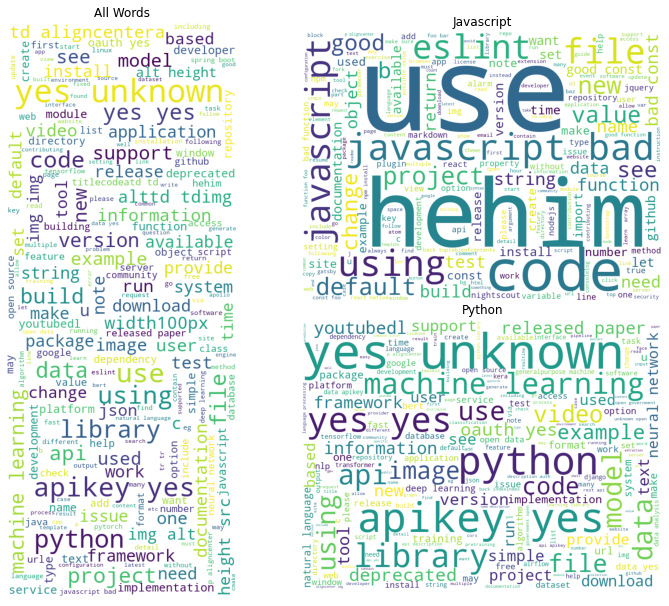

In [68]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))
javascript_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(JavaScript_words))
python_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(Python_words))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(javascript_cloud)
axs[2].imshow(python_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Javascript')
axs[2].set_title('Python')

for ax in axs: ax.axis('off')

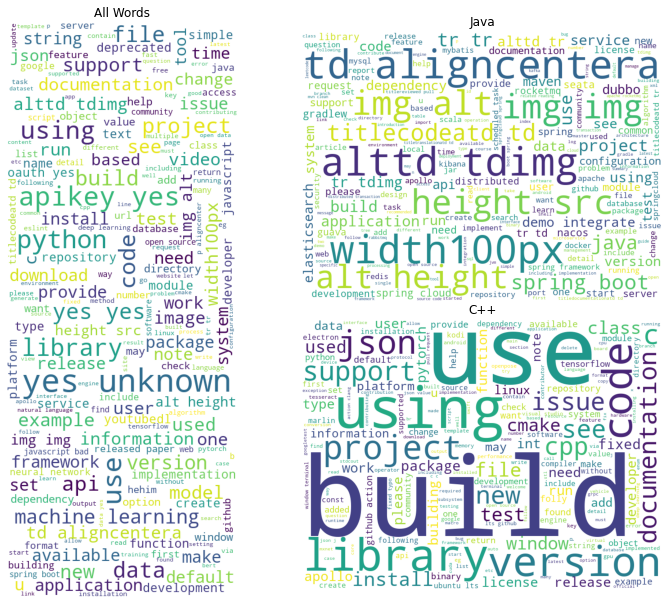

In [69]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))
java_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(Java_words))
c_plus_plus_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(C_plus_plus_words))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(java_cloud)
axs[2].imshow(c_plus_plus_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Java')
axs[2].set_title('C++')

for ax in axs: ax.axis('off')

In [70]:
top_20_javascript_bigrams = (pd.Series(nltk.ngrams(JavaScript_words, 2))
                      .value_counts()
                      .head(20))
top_20_python_bigrams = (pd.Series(nltk.ngrams(Python_words, 2))
                      .value_counts()
                      .head(20))
top_20_java_bigrams = (pd.Series(nltk.ngrams(Java_words, 2))
                      .value_counts()
                      .head(20))
top_20_c_plus_plus_bigrams = (pd.Series(nltk.ngrams(C_plus_plus_words, 2))
                      .value_counts()
                      .head(20))
top_20_all_words_bigrams = (pd.Series(nltk.ngrams(all_words, 2))
                      .value_counts()
                      .head(20))

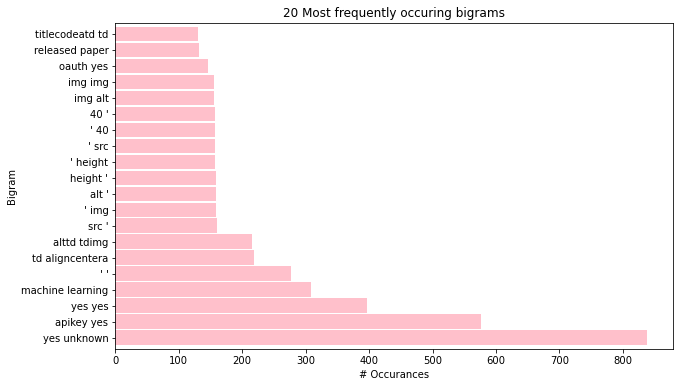

In [71]:
top_20_all_words_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_all_words_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

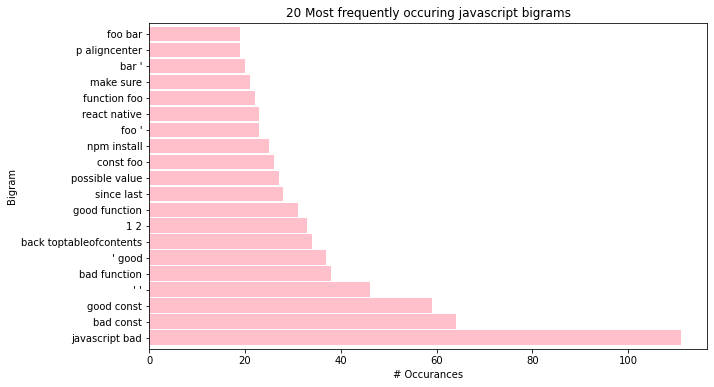

In [72]:
top_20_javascript_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring javascript bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_javascript_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

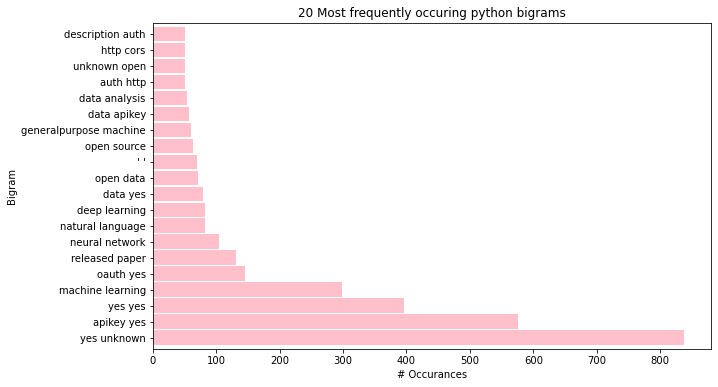

In [73]:
top_20_python_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring python bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_python_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

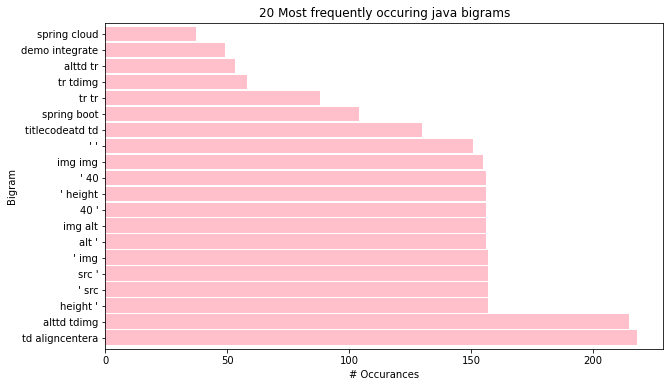

In [74]:
top_20_java_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring java bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_java_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

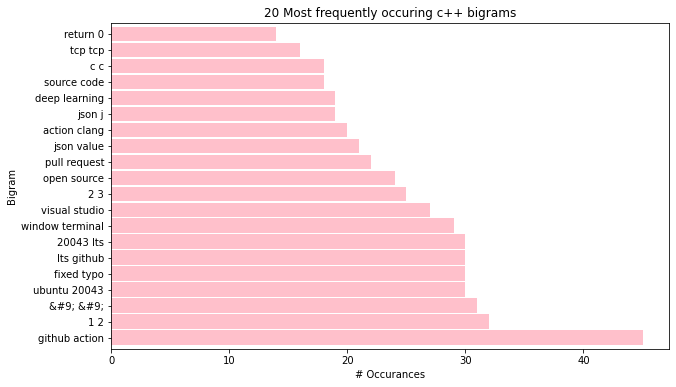

In [75]:
top_20_c_plus_plus_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring c++ bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_c_plus_plus_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

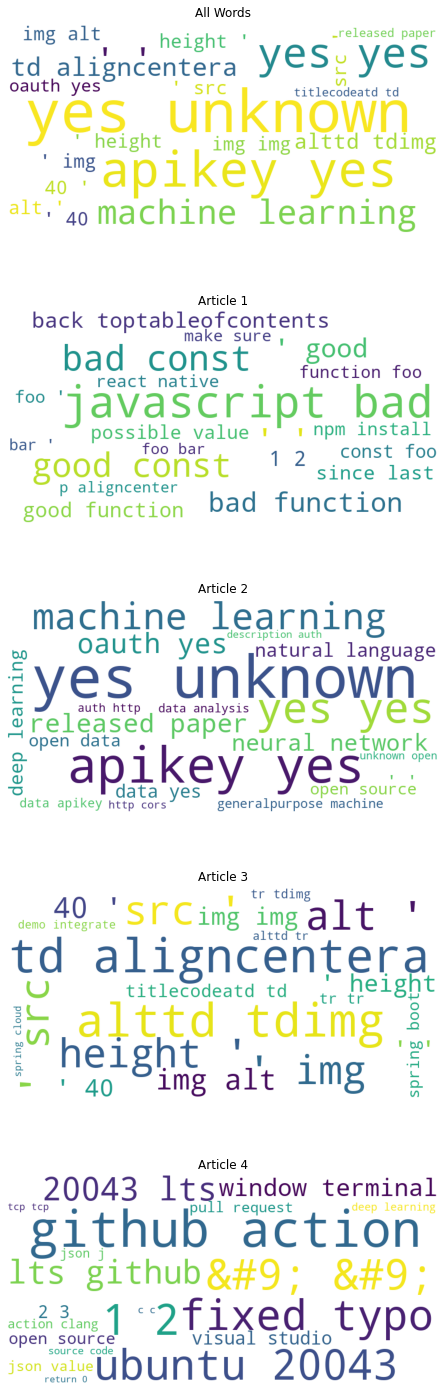

In [77]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.

data = {k[0] + ' ' + k[1]: v for k, v in top_20_all_words_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)

data2 = {k[0] + ' ' + k[1]: v for k, v in top_20_javascript_bigrams.to_dict().items()}
img2 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data2)

data3 = {k[0] + ' ' + k[1]: v for k, v in top_20_python_bigrams.to_dict().items()}
img3 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data3)

data4 = {k[0] + ' ' + k[1]: v for k, v in top_20_java_bigrams.to_dict().items()}
img4 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data4)

data5 = {k[0] + ' ' + k[1]: v for k, v in top_20_c_plus_plus_bigrams.to_dict().items()}
img5 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data5)

axs = [plt.axes([0, 0, 1, 1]), plt.axes([0, 1, 1, 1]), plt.axes([0, 2, 1, 1])
      , plt.axes([0, 3, 1, 1]), plt.axes([0, 4, 1, 1])]

axs[4].imshow(img)
axs[3].imshow(img2)
axs[2].imshow(img3)
axs[1].imshow(img4)
axs[0].imshow(img5)
axs[4].set_title('All Words')
axs[3].set_title('Article 1')
axs[2].set_title('Article 2')
axs[1].set_title('Article 3')
axs[0].set_title('Article 4')
for ax in axs: ax.axis('off')
plt.show()